<a href="https://colab.research.google.com/github/VishnuDuttSharma/occupancy_prediction/blob/main/AI2THOR_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

⚡ _Note_: AI2-THOR often runs significantly _slower_ using Colab's runtime than it does with a local runtime. However, in many cases, it is nice to explore without installing anything locally and not all devices are compatible with running AI2-THOR (e.g., Windows devices, tablets, phones).

In [ ]:
!pip install --upgrade ai2thor ai2thor-colab &> /dev/null
!pip install open3d

     |████████████████████████████████| 300.6 MB 4.8 kB/s 
     |████████████████████████████████| 1.0 MB 41.8 MB/s 
     |████████████████████████████████| 596 kB 66.0 MB/s 
     |████████████████████████████████| 3.1 MB 40.8 MB/s 
     |████████████████████████████████| 8.6 MB 39.7 MB/s 
     |████████████████████████████████| 428 kB 54.9 MB/s 
     |████████████████████████████████| 394 kB 64.9 MB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
     |████████████████████████████████| 125 kB 62.0 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 78 kB 5.5 MB/s 
     |████████████████████████████████| 69 kB 6.2 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2

In [ ]:
!curl https://raw.githubusercontent.com/VishnuDuttSharma/occupancy_prediction/main/helper.py?token=ABZ72EZKRBTDP3NMITZV6GLBSP2CM > helper.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9466  100  9466    0     0  23372      0 --:--:-- --:--:-- --:--:-- 23372


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%matplotlib inline
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

from helper import *

AI2-THOR Version: 3.5.1


In [ ]:
controller = BotController()

thor-Linux64-2f8dd9f95e4016db60155a0cc18b834a6339c8e1.zip: [ 100%  16.5 MiB/s]  of 481.MB
WARNING - 2021-11-09 15:35:33,624 - warnings - /usr/local/lib/python3.7/dist-packages/ai2thor/controller.py:681: UserWarning: On reset and upon initialization, agentMode='bot' has been renamed to agentMode='locobot'.
  "On reset and upon initialization, agentMode='bot' has been renamed to agentMode='locobot'."

INFO - 2021-11-09 15:35:52,265 - controller - Initialize return: {'cameraNearPlane': 0.10000000149011612, 'cameraFarPlane': 20.0}


AI2-THOR Version: 3.5.1


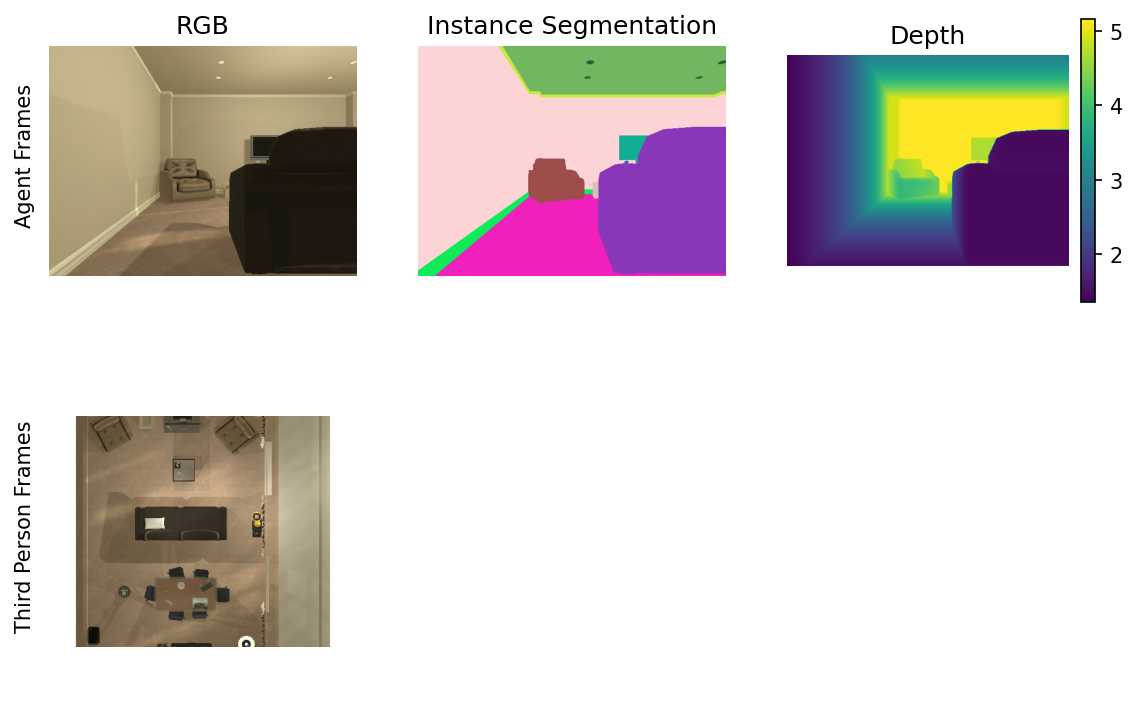

In [ ]:
controller.add_top_camera()
plot_frames(controller.controller.last_event)

AI2-THOR Version: 3.5.1


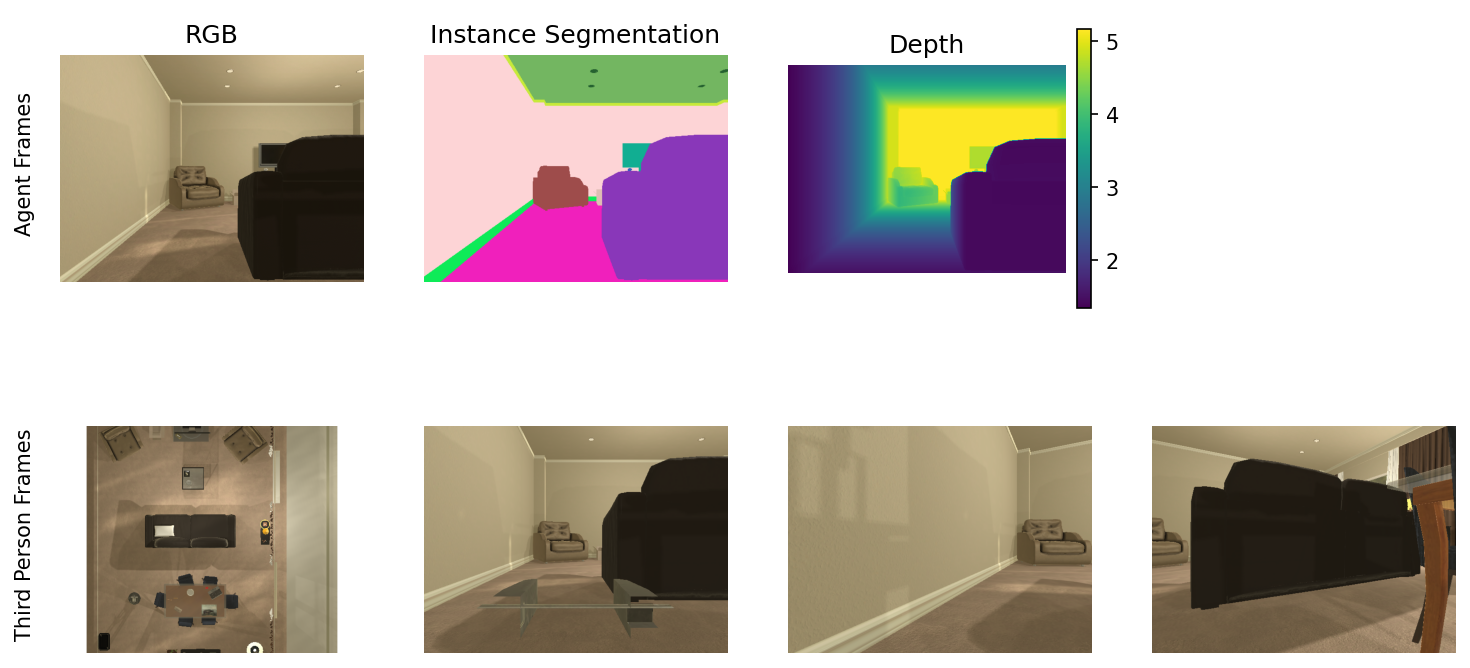

In [ ]:
controller.add_side_cameras()
plot_frames(controller.controller.last_event)

In [ ]:
controller.extra_cameras

{'Center': 1, 'Left': 3, 'Right': 2, 'Top': 0}

In [ ]:
# controller.goto_random_pos()
# plot_frames(controller.controller.last_event)

AI2-THOR Version: 3.5.1


In [ ]:
# controller.goto_random_pos()
# plot_frames(controller.controller.last_event)

In [ ]:
len(controller.get_reacheble_pos())

1602

In [ ]:
# positions = controller.get_reacheble_pos()
# position = random.choice(positions)
# event = controller.controller.step(
#             action="Teleport",
#             position=position
#         )

In [ ]:
# event.metadata['agent']['projectionMatrix']

KeyError: ignored

In [ ]:
intrinsic = controller.get_intrinsic_matric()

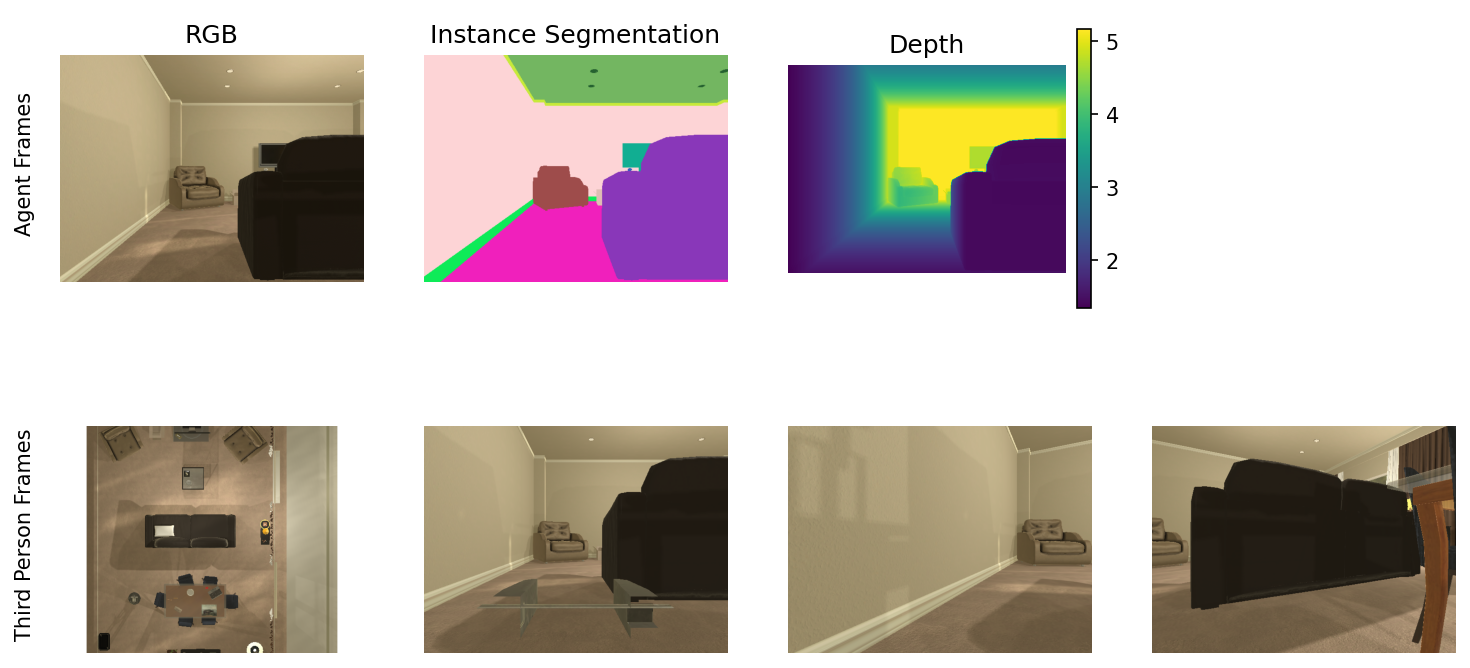

In [ ]:
plot_frames(controller.controller.last_event)

In [ ]:
floor_color = [x['color'] for x in controller.controller.last_event.metadata['colors'] if 'floor' in x['name'].lower()]
ceiling_color = [x['color'] for x in controller.controller.last_event.metadata['colors'] if 'ceiling' in x['name'].lower()]

In [ ]:
img_dict = controller.get_images()

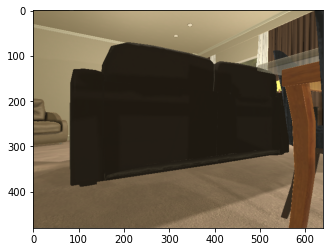

In [ ]:
plt.imshow(img_dict['scene']['Left'])

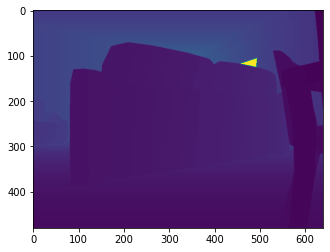

In [ ]:
plt.imshow(img_dict['depth']['Left'])

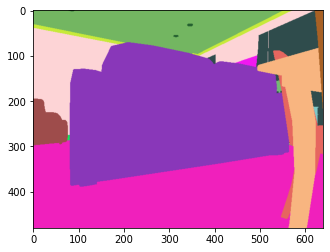

In [ ]:
plt.imshow(img_dict['segment']['Left'])

In [ ]:

# bool_img = np.zeros(seg_img.shape[:2], np.bool)
bool_img = np.zeros(scene_img.shape[:2], np.bool)

# for color in floor_color:
#     bool_img = np.logical_or(bool_img, (scene_img == np.array(color)).all(axis=2))

bool_img = np.logical_or(bool_img, (scene_img == np.array(floor_color[4])).all(axis=2))

plt.imshow(bool_img)

IndexError: ignored

In [ ]:
ceiling_color

[[115, 182, 97], [50, 55, 251], [37, 97, 48], [230, 113, 120]]

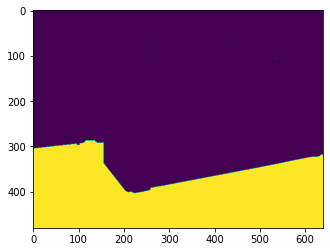

In [ ]:
dummy = depth_img.copy()
dummy[bool_img] = 1000.
plt.imshow(dummy)

In [ ]:
import copy
def get_point_cloud(color_img, depth_img):
    color = o3d.geometry.Image(color_img.astype(np.uint8))
    depth = o3d.geometry.Image(depth_img)
    rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color, depth,
                                                        depth_scale=1.0,
                                                        # depth_trunc=0.7,
                                                        depth_trunc=10.0,
                                                        convert_rgb_to_intensity=False)
    
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, controller.intrinsic)
    # pcd.transform([[1, 0, 0, 0],
    #         [0, -1, 0, 0],
    #         [0, 0, -1, 0],
    #         [0, 0, 0, 1]])

    return pcd

In [ ]:
# scene_img = img_dict['scene']['Center']
scene_img = img_dict['segment']['Center']
depth_img = img_dict['depth']['Center']
# del my_pcd
my_pcd = get_point_cloud(scene_img, depth_img)

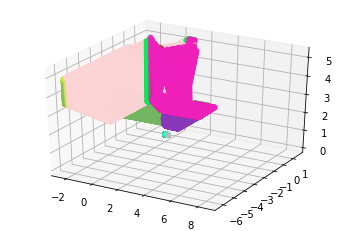

In [ ]:
points_np = np.array(my_pcd.points)
ax = plt.axes(projection='3d')
ax.scatter3D(points_np[:,0], points_np[:,1], points_np[:,2], c=my_pcd.colors, cmap='Greens');

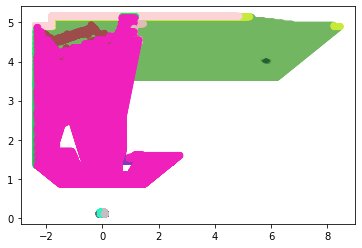

In [ ]:
plt.scatter(points_np[:,0], points_np[:,2], c=my_pcd.colors)

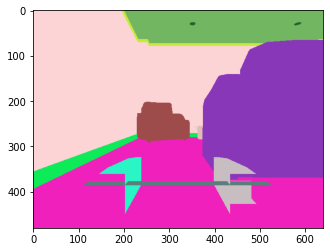

In [ ]:
# scene_img = img_dict['scene']['Center']
scene_img = img_dict['segment']['Center']
depth_img = img_dict['depth']['Center']

my_pcd = get_point_cloud(scene_img, depth_img)
plt.imshow(scene_img)

In [ ]:
def point_filter(pcd, exclusion_list):
    points = np.asarray(pcd.points)
    colors = np.asarray(pcd.colors)

    filter = np.zeros((len(colors),), dtype=np.bool)

    for col in exclusion_list:
        filter += (colors == np.array(col)/255.).all(axis=1)

    return ~filter #pcd.select_by_index(filter[:,0])

In [ ]:
dummy_pcd = copy.copy(my_pcd)

filter = point_filter(dummy_pcd, floor_color+ceiling_color)
dummy_pcd = dummy_pcd.select_by_index(np.where(filter == True)[0])

orig_pcd = copy.copy(dummy_pcd)

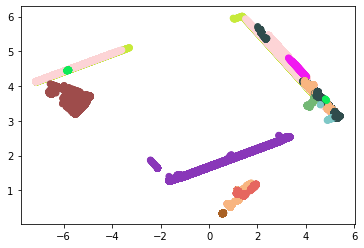

In [ ]:
points_np = np.array(orig_pcd.points)
plt.scatter(points_np[:,0], points_np[:,2], c=dummy_pcd.colors)

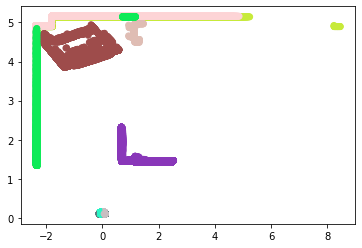

In [ ]:
points_np = np.array(dummy_pcd.points)
plt.scatter(points_np[:,0], points_np[:,2], c=dummy_pcd.colors)

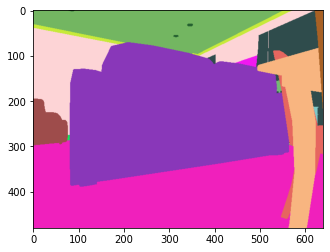

In [ ]:
# scene_img = img_dict['scene']['Left']
scene_img = img_dict['segment']['Left']
depth_img = img_dict['depth']['Left']

orig_pcd = get_point_cloud(scene_img, depth_img)
filter = point_filter(orig_pcd, floor_color+ceiling_color)
orig_pcd = orig_pcd.select_by_index(np.where(filter == True)[0])

plt.imshow(scene_img)

In [ ]:
dummy_pcd = copy.copy(orig_pcd)

filter = point_filter(dummy_pcd, floor_color+ceiling_color)
dummy_pcd = dummy_pcd.select_by_index(np.where(filter == True)[0])

# dummy_pcd = dummy_pcd.translate([0., -controller.tp_side_shift, 0.])
# R = np.linalg.inv(o3d.geometry.get_rotation_matrix_from_xyz((0, -np.pi*30./180, 0)))
R = o3d.geometry.get_rotation_matrix_from_xyz((0., np.pi*30./180, 0))
dummy_pcd = dummy_pcd.rotate(R, center=(0, 0, 0))

# dummy_pcd = dummy_pcd.translate([-controller.tp_side_shift, 0., 0.])

(-4.645767388679089, 6.772762195952238, -0.3564740553361834, 7.505072101356156)

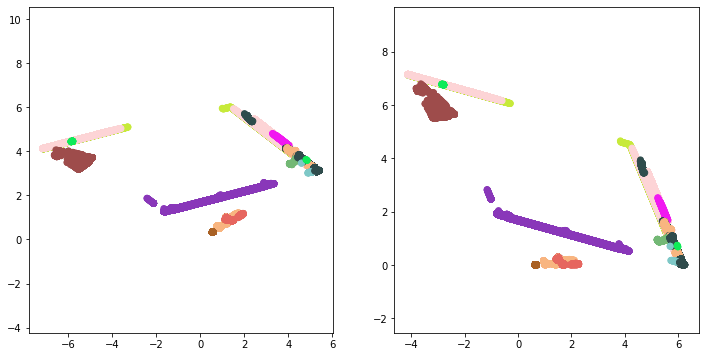

In [ ]:
figs, axes = plt.subplots(1,2, figsize=(12,6))

orig_points = np.asarray(orig_pcd.points)
axes[0].scatter(orig_points[:,0], orig_points[:,2], c=orig_pcd.colors)
axes[0].axis('equal')
dummy_points = np.asarray(dummy_pcd.points)
axes[1].scatter(dummy_points[:,0], dummy_points[:,2], c=dummy_pcd.colors)
axes[1].axis('equal')

In [ ]:
# dummy_points = np.asarray(dummy_pcd.points)
# plt.scatter(dummy_points[:,0], dummy_points[:,2], c=dummy_pcd.colors)
intrinsic.get_focal_length()

(184.75208614068023, 138.56406460551017)

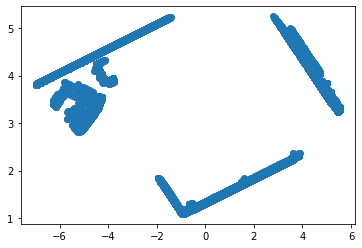

In [ ]:
# dummy_points = np.asarray(dummy_pcd.points)
# plt.scatter(dummy_points[:,0], dummy_points[:,2], c=dummy_pcd.colors)

a = np.asarray(dummy_pcd.points) @ R #@ np.linalg.inv(R)
plt.scatter(a[:,0], a[:,2])

In [ ]:
controller.controller.last_event.metadata['thirdPartyCameras'][controller.extra_cameras['Center']]

{'fieldOfView': 60.0,
 'position': {'x': -4.0, 'y': 0.5, 'z': 1.5},
 'rotation': {'x': -0.0, 'y': 0.0, 'z': 0.0},
 'thirdPartyCameraId': 1}

In [ ]:
controller.controller.last_event.metadata['thirdPartyCameras'][controller.extra_cameras['Right']]

{'fieldOfView': 60.0,
 'position': {'x': -4.0, 'y': 0.5, 'z': 1.7999999523162842},
 'rotation': {'x': -0.0, 'y': 30.000001907348633, 'z': 0.0},
 'thirdPartyCameraId': 3}

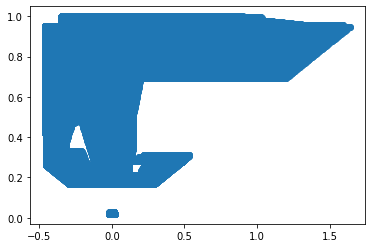

In [ ]:
plt.scatter(points_np[:,0], -points_np[:,2])

# 0: x, 1: z, 

AI2-THOR Version: 3.5.1


In [ ]:
left = -0.2
right = 0.2
top = 0.2;
bottom = -0.2; 
near = 0 #0.1 # https://github.com/allenai/ai2thor/blob/b9d14e5a1ba5e10ddd26323d14337cd5692ae1f9/ai2thor/server.py#L331
far = 1 #20. #1000.


x = 2.0 * near / (right - left);
y = 2.0 * near / (top - bottom);
a = (right + left) / (right - left);
b = (top + bottom) / (top - bottom);
c = -(far + near) / (far - near);
d = -(2.0 * far * near) / (far - near);
e = -1.0
m = np.zeros((4,4))
m[0, 0] = x;
m[0, 1] = 0;
m[0, 2] = a;
m[0, 3] = 0;
m[1, 0] = 0;
m[1, 1] = y;
m[1, 2] = b;
m[1, 3] = 0;
m[2, 0] = 0;
m[2, 1] = 0;
m[2, 2] = c;
m[2, 3] = d;
m[3, 0] = 0;
m[3, 1] = 0;
m[3, 2] = e;
m[3, 3] = 0;

print(m)

[[ 0.5         0.          0.          0.        ]
 [ 0.          0.5         0.          0.        ]
 [ 0.          0.         -1.01005025 -0.20100503]
 [ 0.          0.         -1.          0.        ]]


In [ ]:
%ls /usr/lib/python3.6/distutils/

archive_util.py     debug.py         file_util.py      spawn.py
bcppcompiler.py     dep_util.py      __init__.py       sysconfig.py
ccompiler.py        dir_util.py      log.py            text_file.py
cmd.py              dist.py          msvc9compiler.py  unixccompiler.py
command/            errors.py        _msvccompiler.py  util.py
config.py           extension.py     msvccompiler.py   versionpredicate.py
core.py             fancy_getopt.py  __pycache__/      version.py
cygwinccompiler.py  filelist.py      README


In [ ]:
ai2thor.__file__

'/usr/local/lib/python3.7/dist-packages/ai2thor/__init__.py'

In [ ]:
%cd /usr/local/lib/python3.7/dist-packages/ai2thor/

/usr/local/lib/python3.7/dist-packages/ai2thor


# TO-DOs
- [ ] Realign TP cameras and merge data 
- [ ] Get occupancy map (+ for data, - for floor and ceiling)
- [ ] Generate baseline data using heights
- [ ] Get a working UNet model 

In [ ]:
!find / -name unity 2> /dev/null